# Setup

In [1]:
import os 
import numpy as np
import pandas as pd 
import seaborn as sns
from tqdm import tqdm 

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Select Subset Data

In [2]:
chunksize = 10e5
fields = ['dt', 'chid', 'shop_tag', 'txn_cnt', 'txn_amt']
chunkdata = pd.read_csv('C:\\Users\\User\\Documents\\tbrain_cc_training_48tags_hash_final.csv',usecols=fields ,chunksize=chunksize)
# chunkdata = pd.read_csv('C:\\Users\\User\\Documents\\Cleaned_Shop_tag.csv',usecols=fields ,chunksize=chunksize)
chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in chunkdata:  
    # perform data filtering 
    # chunk_filter = chunk_preprocessing(chunk)
    
    # Once the data filtering is done, append the chunk to list
    chunk_list.append(chunk)
    
# concat the list into dataframe 
df_concat = pd.concat(chunk_list)

In [3]:
len(df_concat.chid.unique()), len(df_concat.shop_tag.unique())

(500000, 49)

In [4]:
df_concat['shop_tag'] = df_concat['shop_tag'].replace(['other'], 49)

In [5]:
df_concat.shop_tag = df_concat.shop_tag.astype(int)

In [6]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32975653 entries, 0 to 32975652
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   dt        int64  
 1   chid      int64  
 2   shop_tag  int32  
 3   txn_cnt   int64  
 4   txn_amt   float64
dtypes: float64(1), int32(1), int64(3)
memory usage: 1.1 GB


In [7]:
tag_list = [2, 6, 10, 12, 13, 15, 18, 19, 21, 22, 25, 26, 36, 37, 39, 48]

In [8]:
dt_sector = df_concat.groupby('dt')
shop_sector = df_concat.groupby('shop_tag')
customer_sector = df_concat.groupby('chid')

In [9]:
summary_df = []
for tag, df in tqdm(shop_sector):
    sum_times = np.sum(df.txn_cnt)
    summary_df.append([tag, sum_times])
summary_df = pd.DataFrame(summary_df, columns=['shop_tag', 'total_times'])    

100%|██████████| 49/49 [00:01<00:00, 27.44it/s]


In [18]:
np.sum(shop_sector.get_group(1).txn_amt) / np.sum(shop_sector.get_group(1).txn_cnt)  #AOV

14193.974603214134

In [10]:
item_list = []
for tag, df in tqdm(shop_sector):
    sum_times = np.sum(df.txn_cnt)
    sum_cost = np.sum(df.txn_amt)
    item_aov = sum_cost / sum_times
    item_list.append(item_aov)
    
summary_df['Item_AOV'] = item_list

100%|██████████| 49/49 [00:01<00:00, 30.23it/s]


In [20]:
summary_df

,shop_tag,total_times,Item_AOV,AOV_order
33,34,229742,2.888655e+109,1
15,16,1112630,1.080725e+61,2
27,28,5145,4.820515e+51,3
38,39,765823,3.308216e+40,4
45,46,569017,5.049194e+25,5
9,10,6904302,7.934700e+13,6
1,2,5016884,1.009974e+09,7
48,49,6605105,4.821795e+06,8
34,35,243314,8.772479e+04,9
23,24,34914,5.793472e+04,10


In [12]:
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   shop_tag     49 non-null     int64  
 1   total_times  49 non-null     int64  
 2   Item_AOV     49 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [16]:
summary_df = summary_df.sort_values(by=['Item_AOV'],ascending=False)

In [19]:
summary_df = summary_df.sort_values(by=['AOV_order'])

In [18]:
summary_df['AOV_order'] = list(range(1,50))

In [21]:
summary_df['Log_AOV'] = np.log(summary_df.Item_AOV)

In [22]:
summary_df.iloc[8:,:]

,shop_tag,total_times,Item_AOV,AOV_order,Log_AOV
34,35,243314,87724.786825,9,11.381960
23,24,34914,57934.715233,10,10.967072
3,4,7055,18475.990044,11,9.824227
40,41,221733,17803.537667,12,9.787152
10,11,351167,14725.368935,13,9.597327
0,1,30779,14193.974603,14,9.560573
37,38,149530,11791.308394,15,9.375118
16,17,448892,11114.437715,16,9.316000
19,20,251150,10952.008804,17,9.301278
26,27,7491,10474.073063,18,9.256658


In [423]:
summary_df.sort_values(by=['total_times'],ascending=False).shop_tag

35    36
36    37
9     10
14    15
44    45
48    49
1      2
47    48
12    13
30    31
11    12
18    19
24    25
15    16
17    18
5      6
46    47
38    39
21    22
20    21
25    26
45    46
8      9
16    17
32    33
10    11
31    32
4      5
19    20
34    35
33    34
40    41
42    43
6      7
7      8
39    40
22    23
37    38
2      3
41    42
29    30
13    14
43    44
23    24
0      1
26    27
3      4
27    28
28    29
Name: shop_tag, dtype: int64

In [425]:
order_list_total_time = summary_df.sort_values(by=['total_times'],ascending=False).shop_tag

In [437]:
order_list_AOV = summary_df.sort_values(by=['AOV_order'],ascending=True).shop_tag

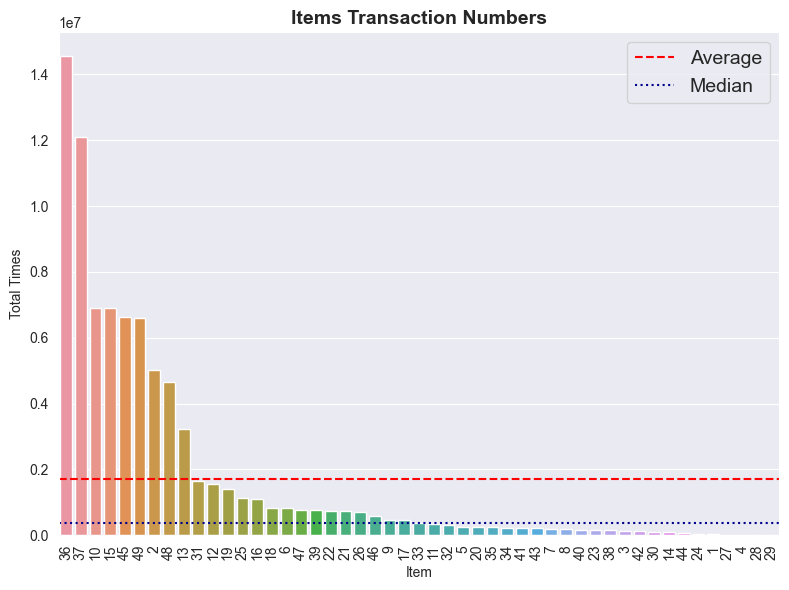

In [431]:
plt.figure(figsize=(8,6))
sns.set_style(style='darkgrid')
ax = sns.barplot(x='shop_tag',
                 y='total_times', 
                 data = summary_df,
                 order=order_list_total_time)

ax.set_title('Items Transaction Numbers', size=14, fontweight="bold")
ax.set(xlabel="Item", ylabel="Total Times")
# ax.set_ytickslabes(np.mean(summary_df.total_times), "Average")
ax.axhline(np.mean(summary_df.total_times), c='red', linestyle='dashed', label="Average")
ax.axhline(np.median(summary_df.total_times), c='darkblue', linestyle='dotted', label="Median")
for item in ax.get_xticklabels():
    item.set_rotation(90)
    
plt.legend(prop={'size':14})
plt.savefig("Transaction times.png")
plt.tight_layout()



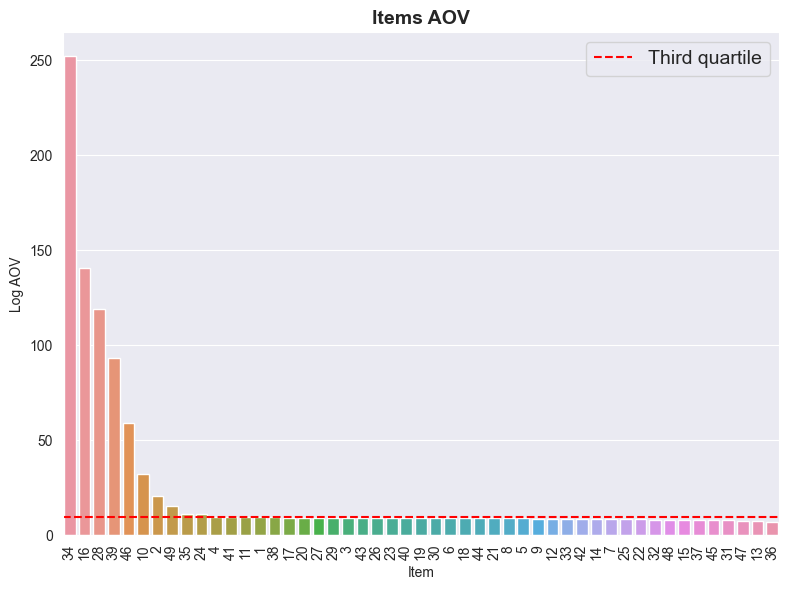

In [441]:
plt.figure(figsize=(8,6))
sns.set_style(style='darkgrid')
ax = sns.barplot(x='shop_tag',
                 y='Log_AOV', 
                 data = summary_df,
                order=order_list_AOV)

ax.set_title('Items AOV', size=14, fontweight="bold")
ax.set(xlabel="Item", ylabel="Log AOV")
ax.axhline(summary_df.Log_AOV.quantile(.75), c='red',ls='--', label="Third quartile")

for item in ax.get_xticklabels():
    item.set_rotation(90)
    
plt.legend(prop={'size':14})
plt.tight_layout()

plt.savefig("Overall_Log_AOV.png")

In [443]:
Drop_out_Top8_AOV = summary_df.iloc[8:,:]

In [446]:
Drop_out_Top8_AOV_tag_list = Drop_out_Top8_AOV.shop_tag

In [449]:
Drop_out_Top8_AOV

,shop_tag,total_times,Item_AOV,AOV_order,Log_AOV
34,35,243314,87724.786825,9,11.381960
23,24,34914,57934.715233,10,10.967072
3,4,7055,18475.990044,11,9.824227
40,41,221733,17803.537667,12,9.787152
10,11,351167,14725.368935,13,9.597327
0,1,30779,14193.974603,14,9.560573
37,38,149530,11791.308394,15,9.375118
16,17,448892,11114.437715,16,9.316000
19,20,251150,10952.008804,17,9.301278
26,27,7491,10474.073063,18,9.256658


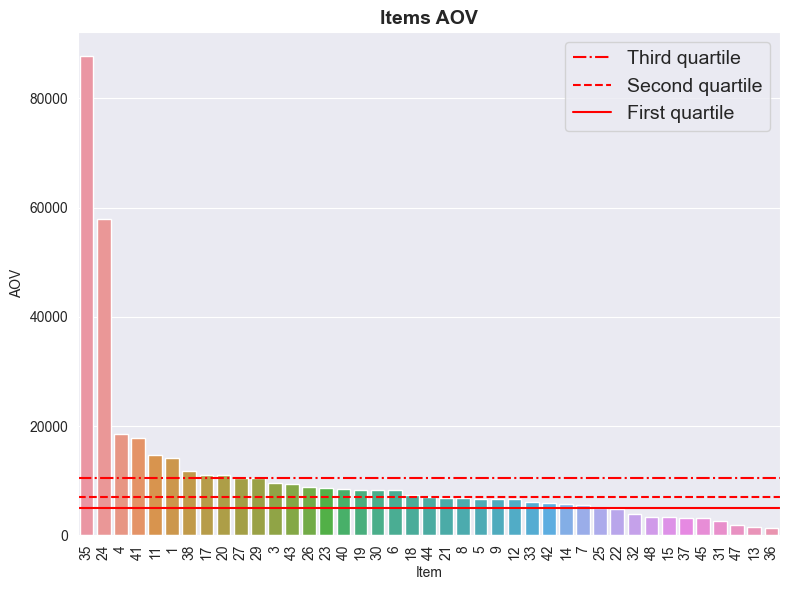

In [453]:
plt.figure(figsize=(8,6))
sns.set_style(style='darkgrid')
ax = sns.barplot(x='shop_tag',
                 y='Item_AOV', 
                 data = Drop_out_Top8_AOV,
                order = Drop_out_Top8_AOV_tag_list)

ax.set_title('Items AOV', size=14, fontweight="bold")
ax.set(xlabel="Item", ylabel="AOV")
ax.axhline(Drop_out_Top8_AOV.Item_AOV.quantile(.75), c='r', label="Third quartile", linestyle="-.")
ax.axhline(Drop_out_Top8_AOV.Item_AOV.quantile(.5), c='r', label="Second quartile", linestyle="--" )
ax.axhline(Drop_out_Top8_AOV.Item_AOV.quantile(.25), c='r', label="First quartile" )

for item in ax.get_xticklabels():
    item.set_rotation(90)
    
plt.legend(prop={'size':14})
plt.tight_layout()

plt.savefig("Drop_out_Top8_AOV.png")

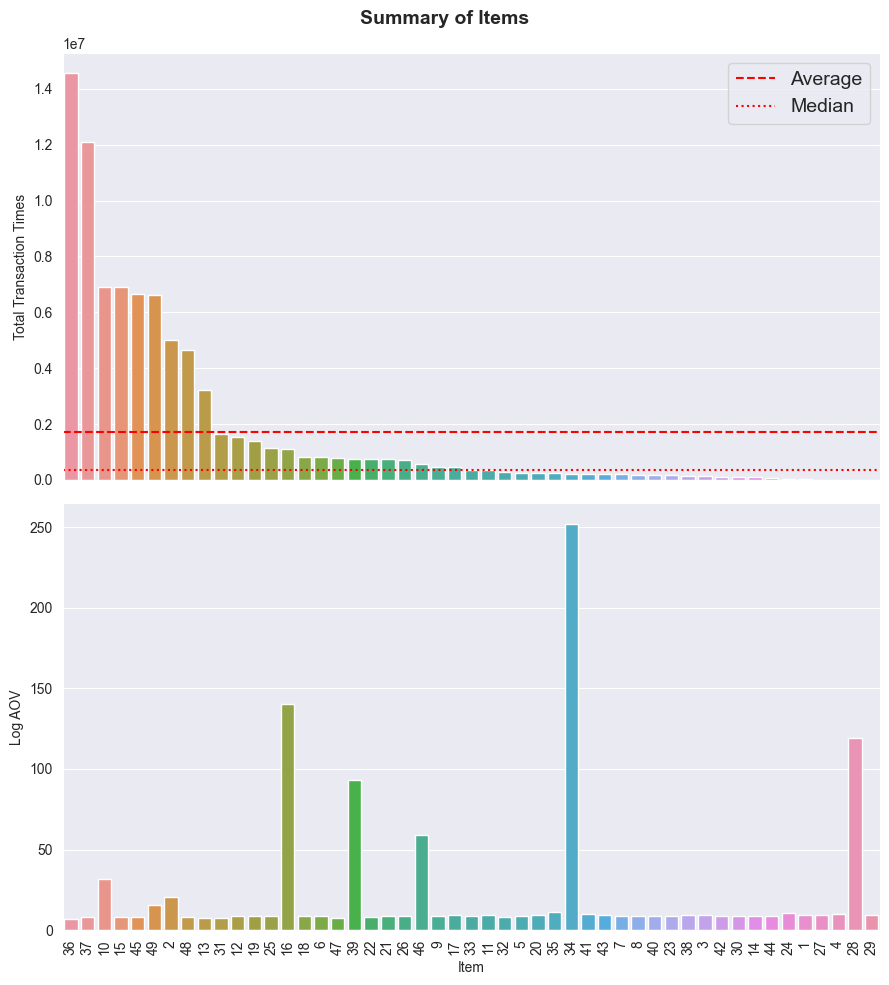

In [462]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 10), sharex=True)
fig.suptitle('Summary of Items', size=14, fontweight="bold" )

# Item Buied Times
sns.set_style(style='darkgrid')
sns.barplot(ax=ax1,x='shop_tag',
                 y='total_times', 
                 data = summary_df,
                 order=order_list_total_time)

ax1.set(xlabel=None,ylabel="Total Transaction Times")
ax1.axhline(np.mean(summary_df.total_times), c='red', linestyle='dashed', label="Average")
ax1.axhline(np.median(summary_df.total_times), c='r', linestyle='dotted', label="Median")
for item in ax1.get_xticklabels():
    item.set_rotation(90)
    
ax1.legend(prop={'size':14})
plt.tight_layout()

# AOV
sns.barplot(ax=ax2,
            x='shop_tag',
            y='Log_AOV', 
            data = summary_df,
            order=order_list_total_time
           )

ax2.set(xlabel="Item", ylabel="Log AOV")
for item in ax2.get_xticklabels():
    item.set_rotation(90)
    
plt.tight_layout()

plt.savefig("Compared_Transactions_and_AOV.png")

In [23]:
chid_list = df_concat.chid.unique()

In [24]:
id_df = pd.DataFrame()
for i in range(6):
    df = customer_sector.get_group(chid_list[i])
    id_df = pd.concat([id_df, df])   


In [33]:
id_df.groupby(['chid', 'dt']).txn_amt.sum().reset_index().pivot('chid', 'dt', 'txn_amt')

dt,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
chid,,,,,,,,,,,,,,,,,,,,,
10001003,69874.734331,68805.448509,112049.848860,37150.635104,100820.878194,105606.848347,24191.604842,141056.223260,87336.045166,125404.969480,...,154907.386527,95667.082748,100198.773012,141338.612960,121119.803438,136376.934089,119814.283225,132301.683410,123917.945610,79534.923853
10134567,33342.759085,17319.109454,2701.173282,30212.629388,12371.319496,29599.815365,39512.690013,25325.861072,7324.516038,25127.950300,...,10616.561549,20902.772112,16972.295087,60173.745847,24155.008310,21181.210056,9134.665855,28692.214763,42648.064368,35701.986396
10256467,2397.282233,14141.447182,2426.347219,32598.759433,2397.282233,2397.282233,9997.710833,2397.282233,20118.695647,2397.282233,...,2397.282233,2397.282233,2397.282233,2397.282233,2397.282233,2397.282233,2397.282233,2397.282233,2397.282233,2397.282233
10267183,21701.307598,13145.795658,16840.340670,5205.435012,19163.398893,34395.516762,5186.053585,9947.350146,20416.094214,16329.985329,...,5081.170603,5061.212598,22449.153982,33199.379452,5034.453815,4973.614040,4980.417980,4946.286371,4932.554730,4932.554730
10321418,16306.649084,33533.921630,26694.645319,11927.179746,13566.268323,18596.174022,11513.183908,5198.984275,15188.064564,17022.659125,...,20722.949799,15454.631862,15218.018193,17061.446491,21906.762828,20666.181036,23056.420107,23318.431221,15894.663270,29169.254924
10414574,81535.899913,77545.345678,92287.238275,211078.873473,116994.354427,95810.341910,128237.491542,115035.361149,233517.053222,147956.488410,...,109045.051638,144244.893657,144305.684009,128611.858905,123666.226951,161066.899463,108406.205006,99352.955666,94299.335378,84467.631085


In [37]:
Selec_6_customer_monthly_sum_txn_amt = id_df.groupby(['chid', 'dt']).txn_amt.sum().reset_index().pivot('dt', 'chid', 'txn_amt')

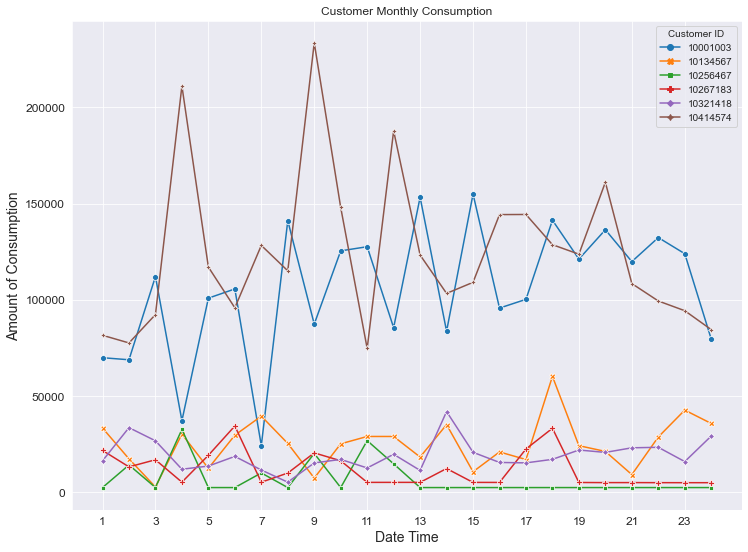

In [82]:
plt.figure(figsize=(12,9))
sns.set_style(style='darkgrid')
ax = sns.lineplot(
        data=Selec_6_customer_monthly_sum_txn_amt,

        markers=True, dashes=False
        )
ax.set_xlabel("Date Time")
ax.set_ylabel("Amount of Consumption")
ax.set_title('Customer Monthly Consumption')
ax.legend(title="Customer ID")
ax.set(xticks=(range(1,25,2)))

plt.savefig("Selec_6_customer_monthly_consumption.png")

In [56]:
ID_10001003 = id_df.loc[id_df.chid == 10001003]


In [106]:
ID_10001003.sort_values(by=['txn_amt'])
# ID_10001003.dt.isin([4, 9, 11, 12])

,dt,chid,shop_tag,txn_cnt,txn_amt
24974096,20,10001003,31,2,1634.383245
21879791,18,10001003,2,1,1770.444612
7674043,8,10001003,2,1,1789.222033
5261520,6,10001003,39,1,1934.162609
26536866,21,10001003,36,2,2003.413324
...,...,...,...,...,...
29734745,23,10001003,10,2,27897.451657
28119901,22,10001003,26,3,35685.046447
10324068,10,10001003,10,4,37244.960373
5261502,6,10001003,28,1,59701.507360


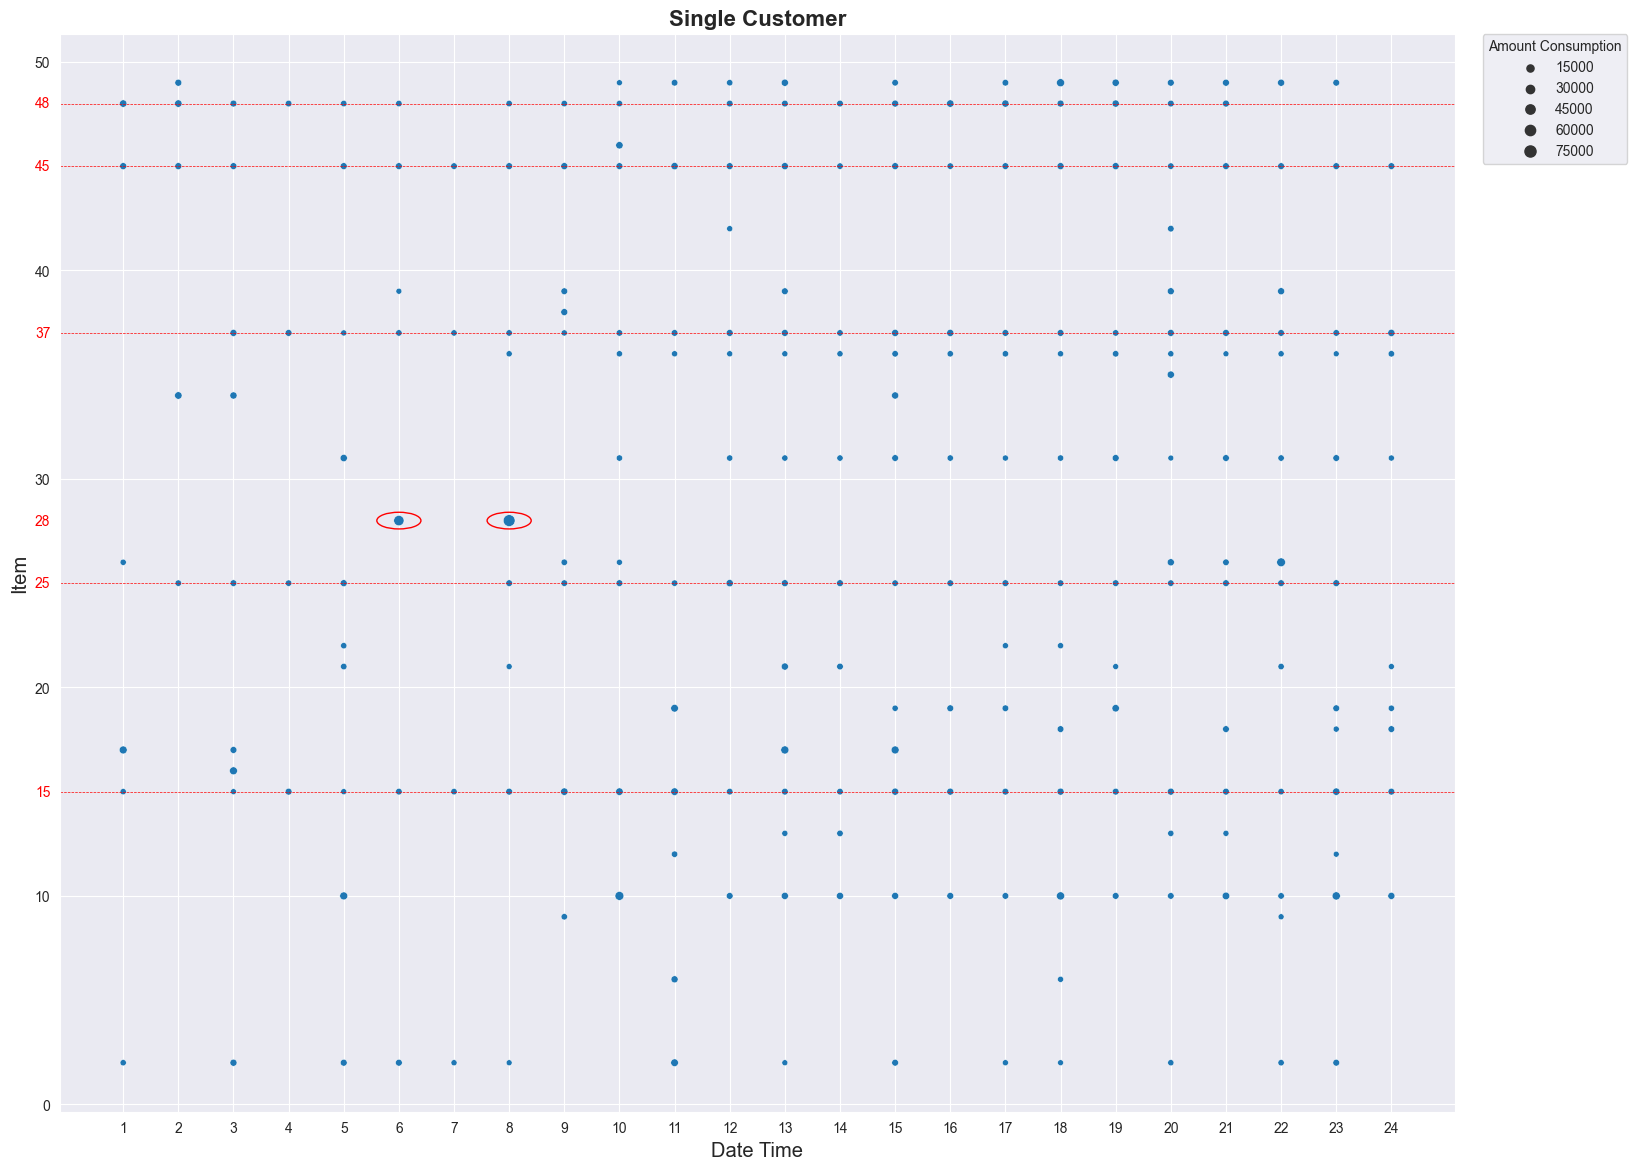

In [268]:
plt.figure(figsize=(18,14))

ax = sns.scatterplot(data = ID_10001003, x = "dt", y = "shop_tag", size="txn_amt")
circle1 = plt.Circle((6, 28), 0.4, color='r', fill=False)
circle2 = plt.Circle((8, 28), 0.4, color='r', fill=False)
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)
ax.set_xlabel("Date Time",fontsize=14.5)
ax.set_ylabel("Item",fontsize=14.5)
ax.set_title('Single Customer',fontsize=16, fontweight='bold')
ax.legend(title="Total Amount")
ax.set(xticks=(range(1,25)))
ax.axhline(48, ls='--', linewidth = 0.5, color='r')
ax.text(-.6, 47.8, 48, c='r')
ax.axhline(45, ls='--', linewidth = 0.5, color='r')
ax.text(-.6, 44.8, 45, c='r')
ax.axhline(37, ls='--', linewidth = 0.5, color='r')
ax.text(-.6, 36.8, 37, c='r')
ax.axhline(25, ls='--', linewidth = 0.5, color='r')
ax.text(-.6, 24.8, 25, c='r')
ax.axhline(15, ls='--', linewidth = 0.5, color='r')
ax.text(-.6, 14.8, 15, c='r')

ax.text(-.6, 27.8, 28, c='r')
# ax.add_patch(circle1)
# ax.add_patch(circle2)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Amount Consumption")
plt.savefig("10001003_monthly_consumption.png")

<function matplotlib.pyplot.show(close=None, block=None)>

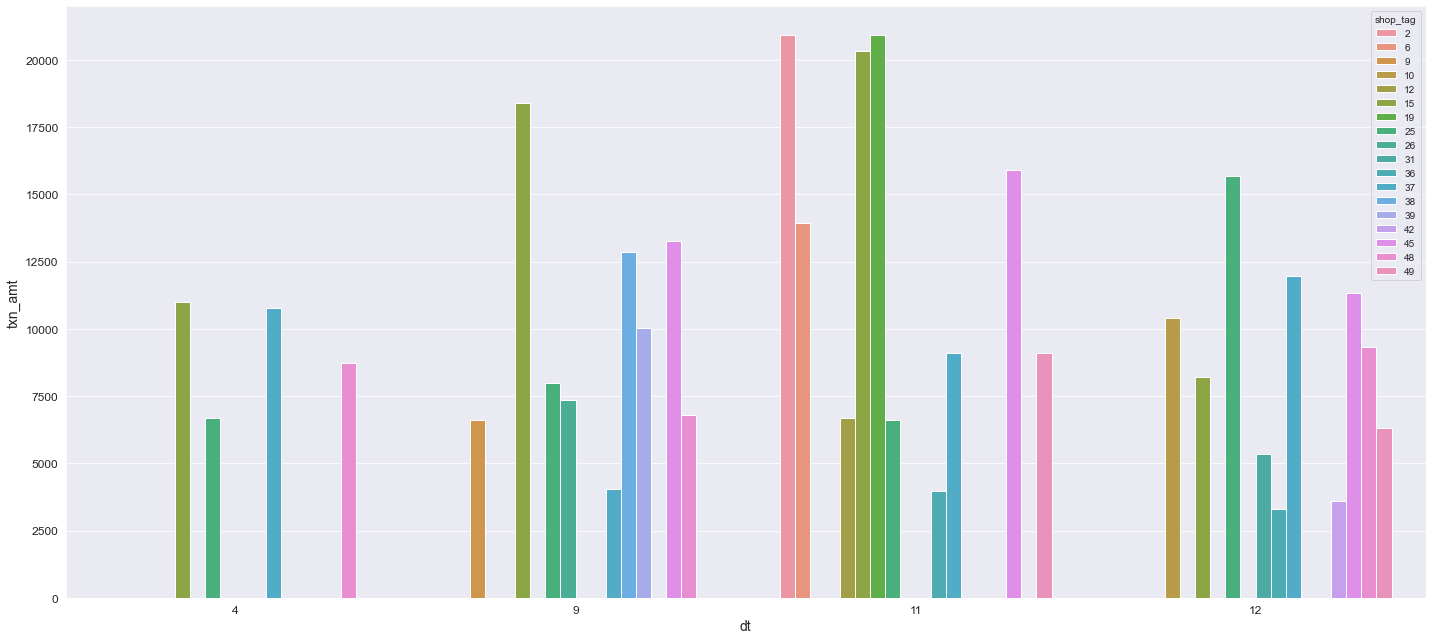

In [67]:
plt.figure(figsize=(20,9))
sns.barplot(data = ID_10001003.loc[ID_10001003.dt.isin([4, 9, 11, 12])],
             x = "dt", y = "txn_amt", hue = "shop_tag")
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

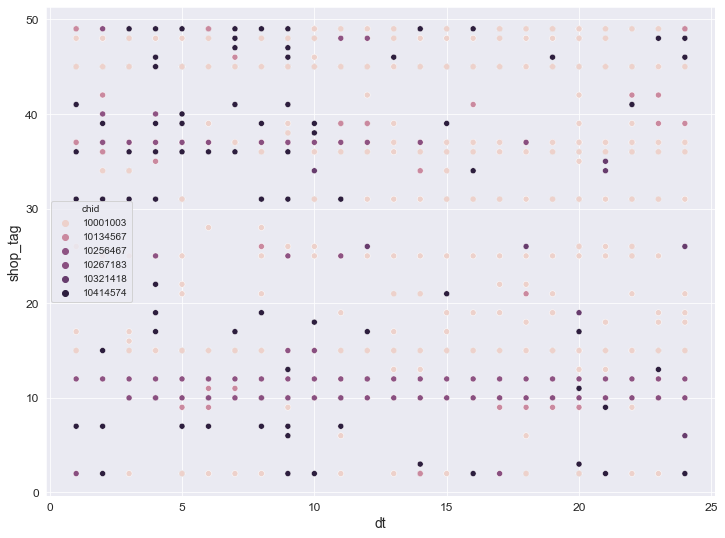

In [138]:
plt.figure(figsize=(12,9))
sns.scatterplot(data = id_df, x = "dt", y = "shop_tag", hue = "chid")
plt.show

In [140]:
customer_sector.get_group(chid_list[0])

,dt,chid,shop_tag,txn_cnt,txn_amt
0,1,10321418,45,3,3891.965283
188,1,10321418,49,1,5773.036485
189,1,10321418,37,5,6641.647316
961692,2,10321418,34,1,22437.619357
961703,2,10321418,37,5,5738.873935
...,...,...,...,...,...
29734426,23,10321418,45,1,2136.253500
31391653,24,10321418,6,1,1309.634076
31391662,24,10321418,26,1,11177.269159
31391680,24,10321418,49,1,5773.036485


<function matplotlib.pyplot.show(close=None, block=None)>

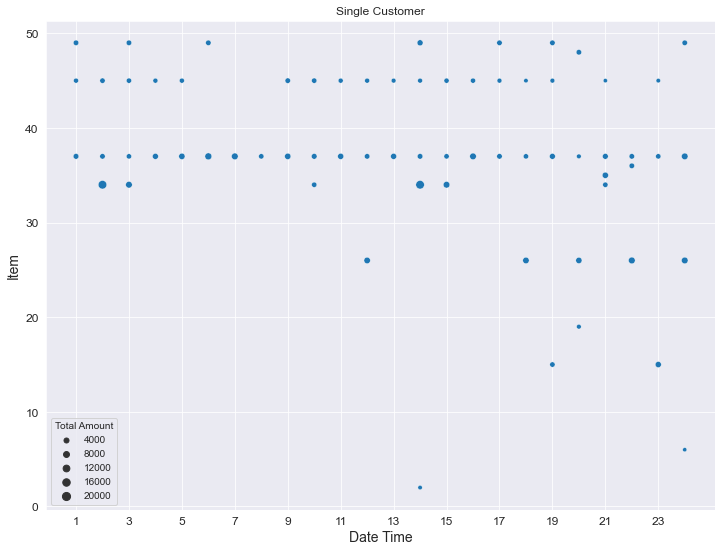

In [83]:
plt.figure(figsize=(12,9))
ax = sns.scatterplot(data = customer_sector.get_group(chid_list[0]), x = "dt", y = "shop_tag", size="txn_amt")
ax.set_xlabel("Date Time")
ax.set_ylabel("Item")
ax.set_title('Single Customer')
ax.legend(title="Total Amount")
ax.set(xticks=(range(1,25,2)))

plt.show

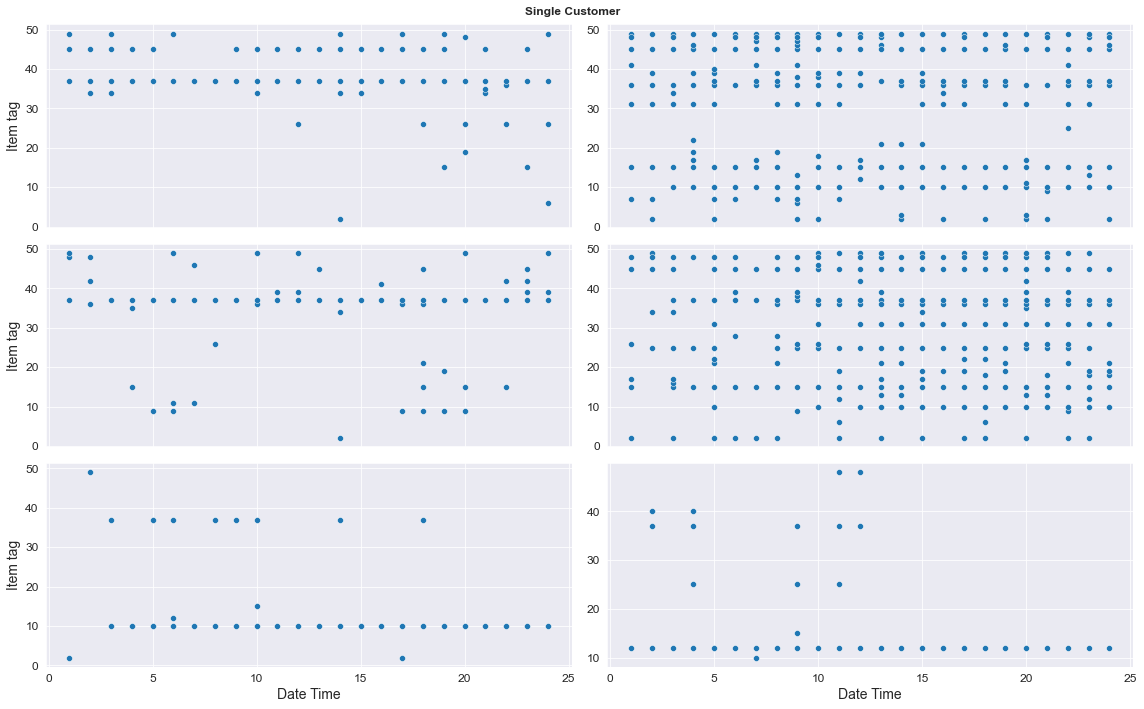

In [190]:
plt.figure(figsize=(16,10))
plt.subplot(321)
sns.set_style(style='darkgrid')
plt.suptitle("Single Customer", fontweight="bold")

ax1 = sns.scatterplot(data = customer_sector.get_group(chid_list[0]), x = "dt", y = "shop_tag")
ax1.set_xlabel(None)
ax1.set_ylabel("Item tag")
ax1.set(xticklabels=[])

plt.subplot(322)
ax2 = sns.scatterplot(data = customer_sector.get_group(chid_list[1]), x = "dt", y = "shop_tag")
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set(xticklabels=[])

plt.subplot(323)
ax3 = sns.scatterplot(data = customer_sector.get_group(chid_list[2]), x = "dt", y = "shop_tag")
ax3.set_xlabel(None)
ax3.set_ylabel("Item tag")
ax3.set(xticklabels=[])

plt.subplot(324)
ax4 = sns.scatterplot(data = customer_sector.get_group(chid_list[3]), x = "dt", y = "shop_tag")
ax4.set_xlabel(None)
ax4.set_ylabel(None)
ax4.set(xticklabels=[])

plt.subplot(325)
ax5 = sns.scatterplot(data = customer_sector.get_group(chid_list[4]), x = "dt", y = "shop_tag")
ax5.set_xlabel("Date Time")
ax5.set_ylabel("Item tag")

plt.subplot(326)
ax6 = sns.scatterplot(data = customer_sector.get_group(chid_list[5]), x = "dt", y = "shop_tag")
ax6.set_ylabel(None)
ax6.set_xlabel("Date Time")

plt.tight_layout()

plt.savefig("Selec_6_customer_monthly_items.png")

In [197]:
len(df_concat.chid.unique())

500000

In [188]:
dt_sector.get_group(1).txn_cnt.sum(),dt_sector.get_group(15).txn_cnt.sum(), dt_sector.get_group(24).txn_cnt.sum()

(2073622, 4111849, 3908921)

In [123]:
total_list = []
for i in range(1,25):
    total_customer = len(dt_sector.get_group(i).chid.unique())
    total_transanction = np.sum(dt_sector.get_group(i).txn_amt)
    total_amount = np.sum(dt_sector.get_group(i).txn_cnt)
    total_list.append([total_customer, total_transanction, total_amount])
    
Customer_df = pd.DataFrame(data=total_list, columns=['chid', 'txn_amt', 'txn_cnt'])
Customer_df['dt'] = range(1,25)

In [146]:
Customer_df.set_index('dt', inplace=True)

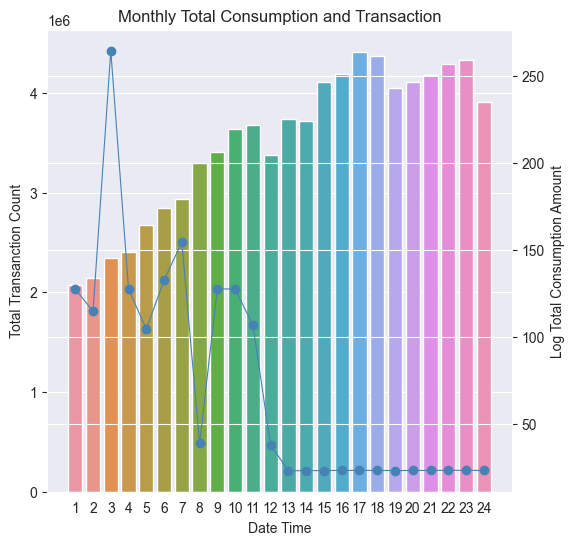

In [269]:
plt.figure(figsize=(6,6))
sns.set_style('darkgrid')
ax1 = sns.barplot(x='dt', y='txn_cnt', data=Customer_df)

ax1.set_xlabel("Date Time")
ax1.set_ylabel("Total Transanction Count")
ax1.set_title("Monthly Total Consumption and Transaction")

ax2 = ax1.twinx()
ax2.plot(ax1.get_xticks(), np.log(Customer_df.txn_amt), 'o-', lw=0.8, c='steelblue')
ax2.set_ylabel("Log Total Consumption Amount")

plt.savefig("Total_cnt_vs_Total_amt_wt_dt.png")
plt.show()


In [189]:
dt_3_df = dt_sector.get_group(3)
dt_16_df = dt_sector.get_group(16)

In [190]:
dt_3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070923 entries, 1965569 to 3036719
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   dt        1070923 non-null  int64  
 1   chid      1070923 non-null  int64  
 2   shop_tag  1070923 non-null  int32  
 3   txn_cnt   1070923 non-null  int64  
 4   txn_amt   1070923 non-null  float64
dtypes: float64(1), int32(1), int64(3)
memory usage: 44.9 MB


In [195]:
dt_3_sum = dt_3_df.groupby('shop_tag').txn_amt.sum().to_frame()

In [202]:
dt_3_sum['Log txn_amt'] = np.log(dt_3_sum.txn_amt)

In [217]:
dt_16_sum = dt_16_df.groupby('shop_tag').txn_amt.sum().to_frame()
dt_16_sum['Log txn_amt'] = np.log(dt_16_sum.txn_amt)
dt_16_sum = dt_16_sum.reset_index()

In [227]:
dt_3_sum

,shop_tag,txn_amt,Log txn_amt
0,1,2.071102e+07,16.846177
1,2,7.616095e+08,20.450945
2,3,3.732404e+07,17.435148
3,4,6.431988e+06,15.676794
4,5,4.264109e+07,17.568329
5,6,2.232102e+08,19.223625
6,7,5.485452e+07,17.820195
7,8,3.346651e+07,17.326056
8,9,9.514090e+07,18.370869
9,10,6.992566e+08,20.365528


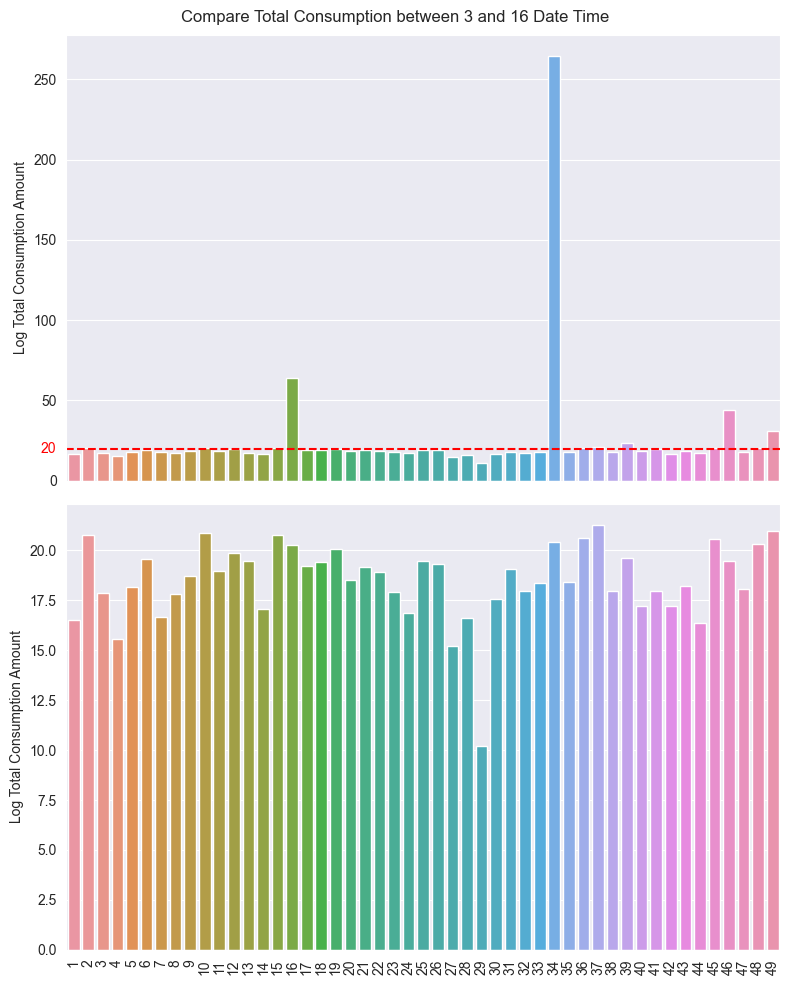

In [242]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10), sharex=True)
plt.suptitle('Compare Total Consumption between 3 and 16 Date Time')

sns.barplot(ax=ax1, x='shop_tag',
                    y='Log txn_amt', 
                    data = dt_3_sum,)
ax1.axhline(20, c='red', linestyle='dashed')
ax1.text(-1.2,20, 20, color="red",
         ha="right", va="center")
ax1.set(xlabel=None, ylabel="Log Total Consumption Amount")

for item in ax.get_xticklabels():
    item.set_rotation(90)
    
plt.tight_layout()

sns.barplot(ax=ax2, x='shop_tag',
                    y='Log txn_amt', 
                    data = dt_16_sum,)

ax2.set(xlabel=None, ylabel="Log Total Consumption Amount")

for item in ax2.get_xticklabels():
    item.set_rotation(90)
    
plt.tight_layout()

plt.savefig("Compare 3 and 16 Date Transaction.png")

In [243]:
Item_list_df = pd.DataFrame()
for tag in tqdm(tag_list):
    tag_df = shop_sector.get_group(tag)
    Item_list_df = pd.concat([Item_list_df, tag_df])
    

100%|██████████| 16/16 [00:04<00:00,  3.57it/s]


In [244]:
Item_list_df.shop_tag.unique()

array([ 2,  6, 10, 12, 13, 15, 18, 19, 21, 22, 25, 26, 36, 37, 39, 48])

In [245]:
Shop_tag_df = pd.DataFrame()
for tag in tag_list:
    Selection_df = Item_list_df.loc[Item_list_df.shop_tag == tag]
    Summary_df = Selection_df.groupby('dt').sum().txn_cnt.reset_index()
    Summary_df['shop_tag'] = np.repeat(tag,24)
    Shop_tag_df = pd.concat([Shop_tag_df, Summary_df])

In [246]:
Shop_tag_pivot = Shop_tag_df.pivot("dt", "shop_tag", "txn_cnt")
Shop_tag_pivot

shop_tag,2,6,10,12,13,15,18,19,21,22,25,26,36,37,39,48
dt,,,,,,,,,,,,,,,,
1,135975,24169,177032,48792,9947,145975,21447,40981,21327,22124,33822,20943,205812,334790,23915,159457
2,139728,25423,173277,48928,11368,147967,22038,45160,19552,21528,32408,21179,234392,329233,25281,156243
3,150237,26326,183109,50251,16100,164199,24078,47785,21229,22213,35329,23747,276755,360624,25100,168704
4,163787,28481,186725,47890,16688,179394,24158,52857,24184,24182,36513,22753,296144,386496,27993,168068
5,173136,30578,194048,56494,19357,204983,26850,54454,25857,25983,38198,26321,342621,426065,35416,181548
6,180530,31122,219277,54794,36703,226204,28118,54035,28602,26424,39654,26313,416490,465042,33877,188915
7,175208,29508,236565,55915,55532,227800,30131,50468,26414,26817,41478,25600,472910,437572,28820,193140
8,232923,31511,252531,62411,73013,251106,33263,57833,26967,27537,45596,29815,581045,462776,34860,207108
9,223294,32089,311188,68452,83553,253768,33328,62913,27051,27328,44631,29558,591565,467114,38205,208584


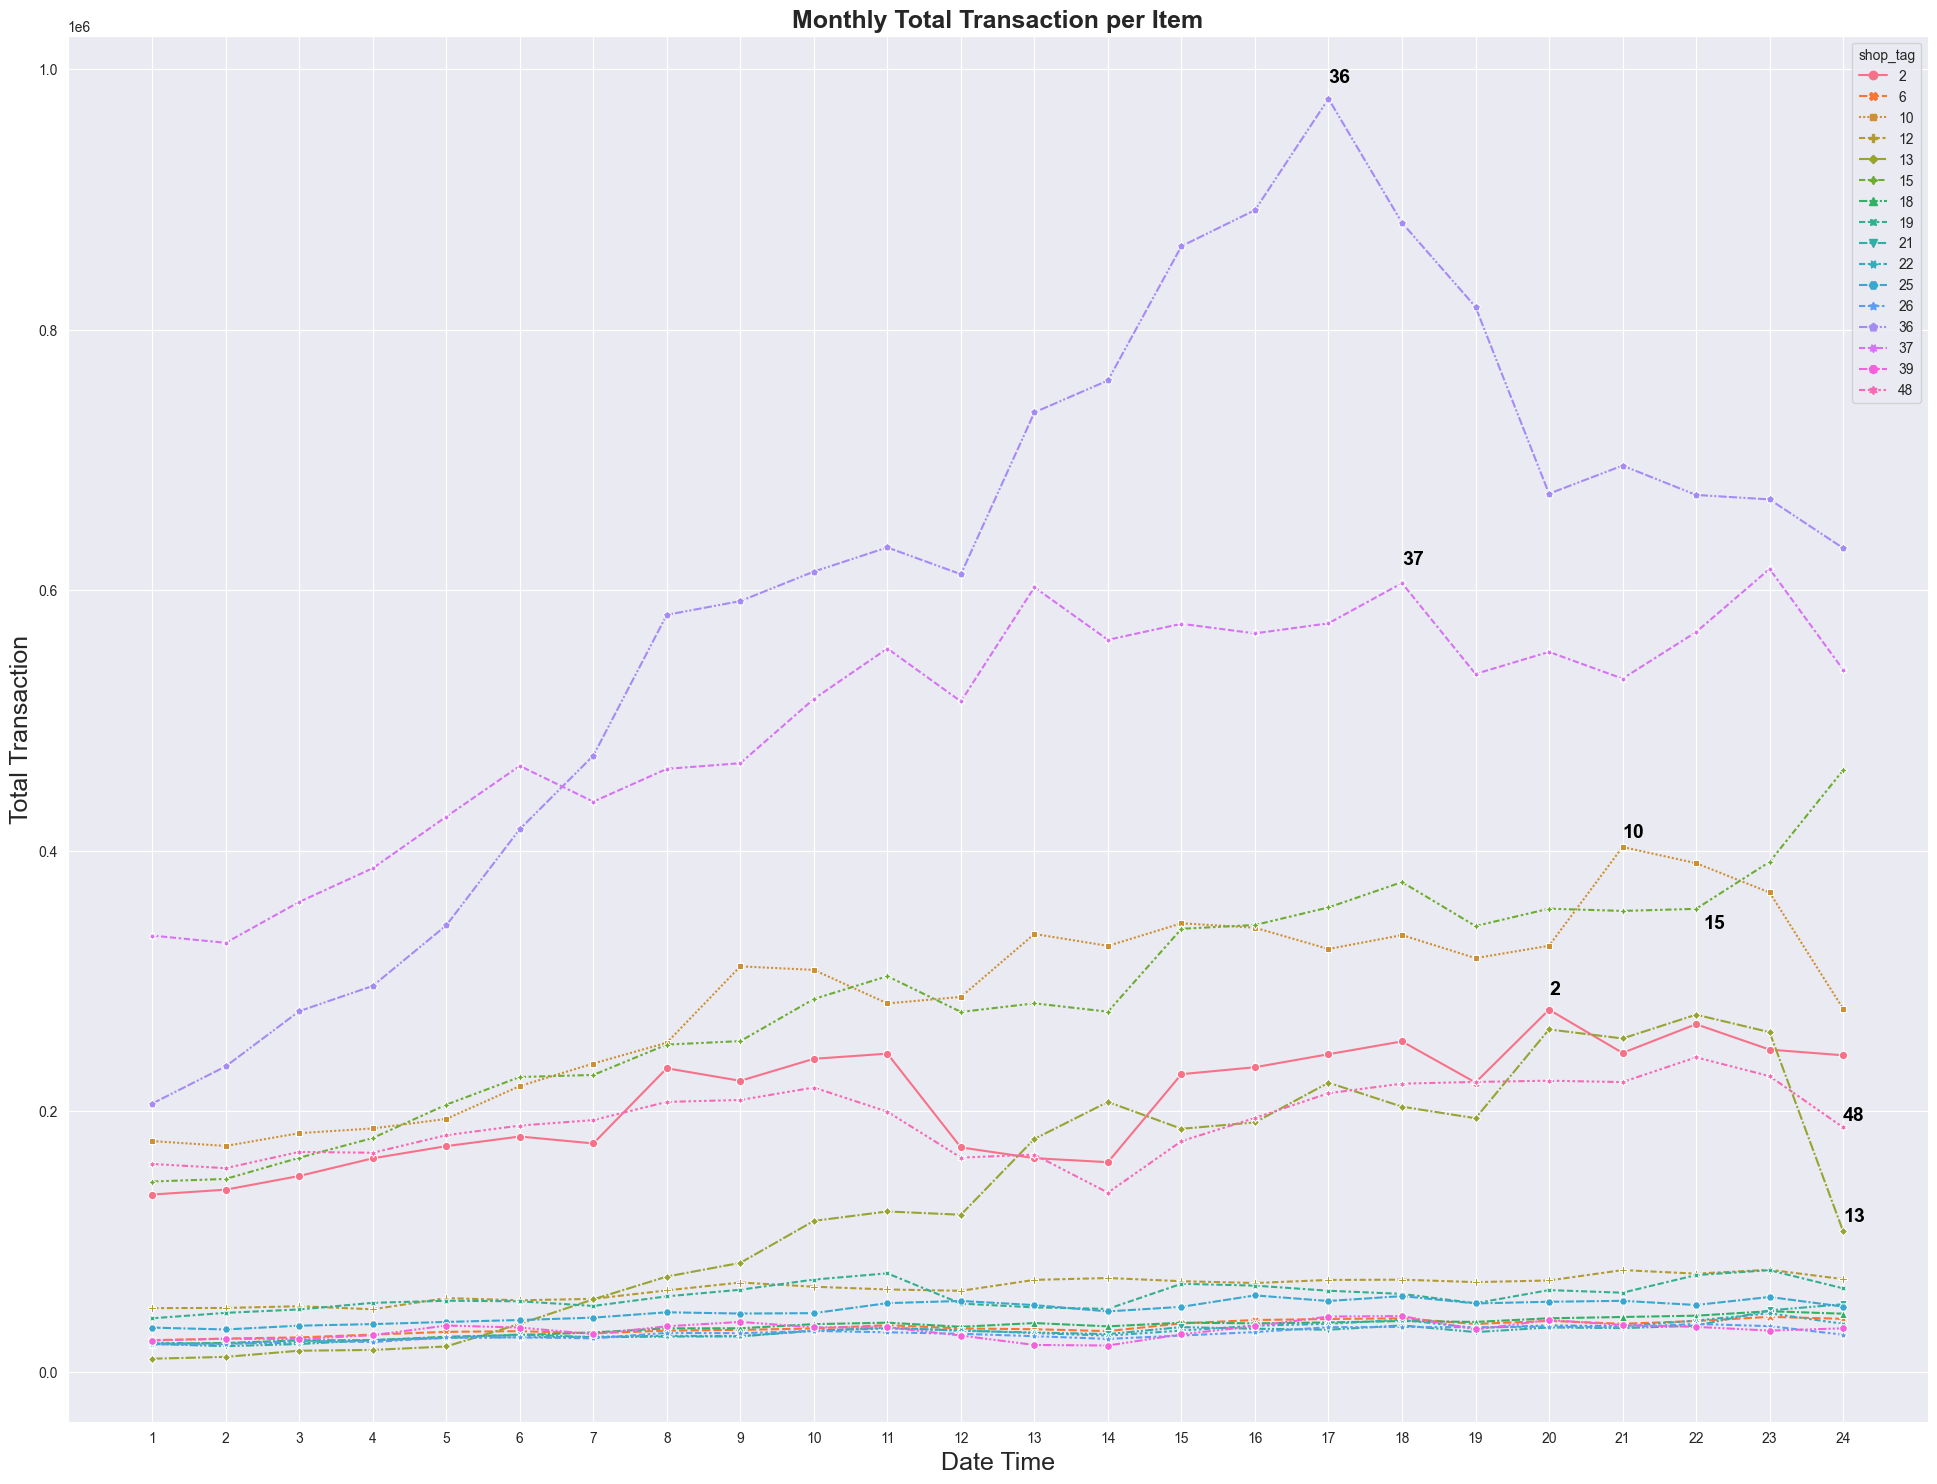

In [253]:
plt.figure(figsize=(24,18))
sns.set_style(style='darkgrid')
ax = sns.lineplot(data=Shop_tag_pivot,
                  markers=True)

ax.text(17, 990000, "36", horizontalalignment='left', fontsize=14, color='black', weight='semibold')
ax.text(18, 620000, "37", horizontalalignment='left', fontsize=14, color='black', weight='semibold')
ax.text(21, 410000, "10", horizontalalignment='left', fontsize=14, color='black', weight='semibold')
ax.text(22.1, 340000, "15", horizontalalignment='left', fontsize=14, color='black', weight='semibold')
ax.text(20, 290000, "2", horizontalalignment='left', fontsize=14, color='black', weight='semibold')
ax.text(24, 193000, "48", horizontalalignment='left', fontsize=14, color='black', weight='semibold')
ax.text(24, 115000, "13", horizontalalignment='left', fontsize=14, color='black', weight='semibold')

ax.set_xticks(range(1,25))
ax.set_xlabel("Date Time",fontsize=18)
ax.set_ylabel("Total Transaction",fontsize=18)
ax.set_title("Monthly Total Transaction per Item", fontsize=18, fontweight="bold")

plt.savefig("Shop_tag_Monthly_Transaction.png")

In [274]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971956 entries, 4 to 32975644
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   dt        int64  
 1   chid      int64  
 2   shop_tag  int32  
 3   txn_cnt   int64  
 4   txn_amt   float64
dtypes: float64(1), int32(1), int64(3)
memory usage: 82.7 MB


In [395]:
len(dt_sector.get_group(1).loc[dt_sector.get_group(1).shop_tag.isin(tag_list)].chid.unique())

269235

In [397]:
# temp_df = len(dt_sector.get_group(1).chid.unique())
# len(temp_df.chid.unique())

Monthly_Customers = [len(dt_sector.get_group(dt).loc[dt_sector.get_group(dt).shop_tag.isin(tag_list)].chid.unique()) for dt in range(1,25)]
Monthly_Customers

[269235,
 271954,
 280979,
 284914,
 294049,
 305849,
 307451,
 322463,
 330828,
 339900,
 351457,
 339904,
 346938,
 347220,
 362789,
 366298,
 374708,
 380041,
 376698,
 384123,
 388133,
 394941,
 407682,
 404447]

In [378]:
from matplotlib import markers
# get all possible shapes
all_shapes = list(markers.MarkerStyle.markers.keys())
# print list of shapes

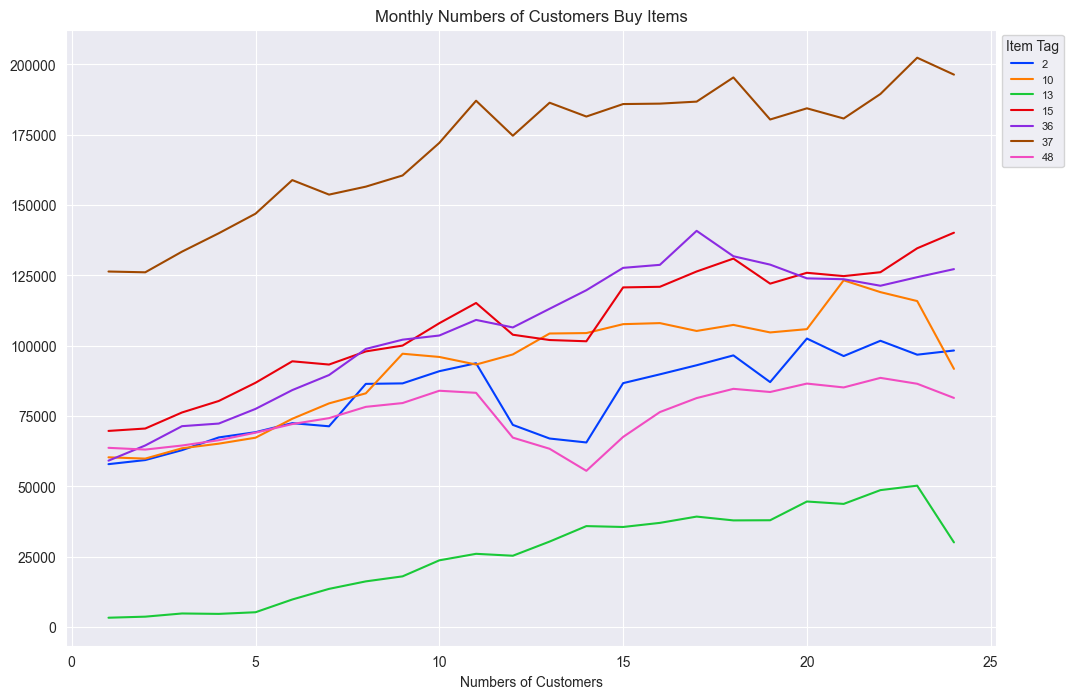

In [398]:
def get_size_of_monthly_per_item(tag):
    temp_df = shop_sector.get_group(tag)
    size = temp_df.groupby('dt').size()
    return size

plt.figure(12, figsize=(12,8))
sns.set_palette(sns.color_palette("bright"))
sns.set_style('darkgrid')
len_index = 0
for tag in [2, 10, 13, 15, 36, 37, 48]:
    sns.lineplot(x=range(1,25), y=get_size_of_monthly_per_item(tag), label=tag)
#     sns.lineplot(x=range(1,25), y=get_size_of_monthly_per_item(tag), label=tag, marker=all_shapes[len_index], size=5)
    len_index +=1
plt.xlabel("Numbers of Customers")
plt.title("Monthly Numbers of Customers Buy Items")
plt.legend(title="Item Tag", loc = 2, bbox_to_anchor = (1,1), prop={'size': 8})
    

<AxesSubplot:xlabel='dt', ylabel='Log_txn_amt'>

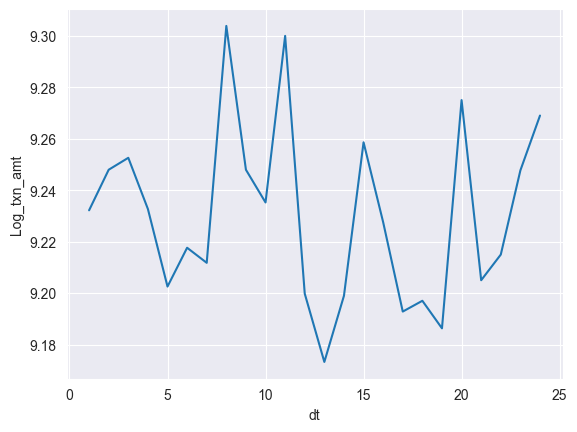

In [285]:
selection_temp_df = temp_df.groupby('dt').median().reset_index()
selection_temp_df['Log_txn_amt'] = np.log(selection_temp_df.txn_amt)
sns.lineplot(x='dt', y='Log_txn_amt', data=selection_temp_df)

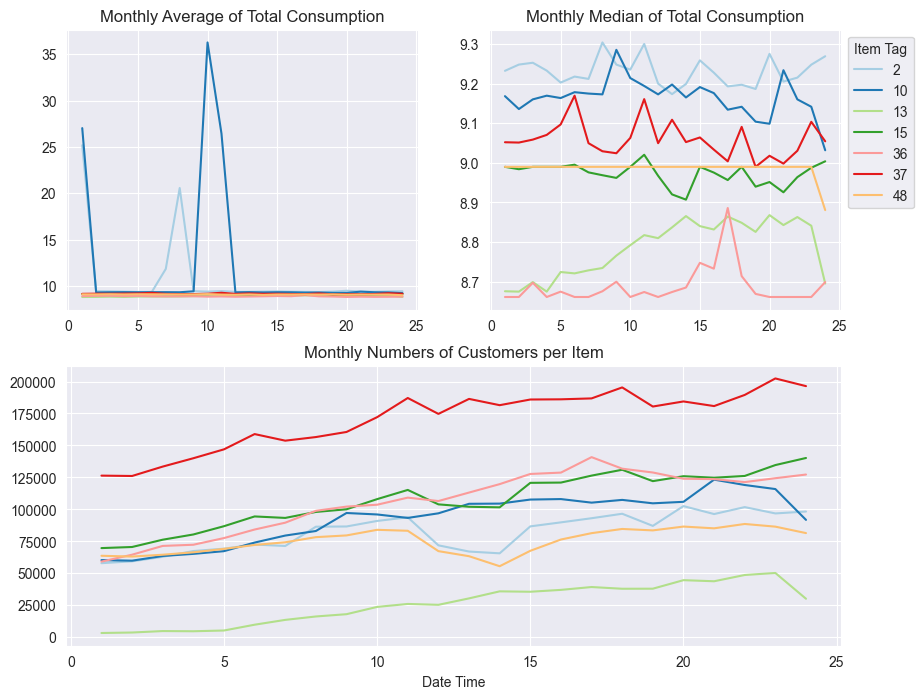

In [412]:
def draw_mean_median_plot(tag, statistic):
    Selection_df = shop_sector.get_group(tag)
    
    if statistic == 'mean':
        Selection_df = Selection_df.groupby('dt').mean().reset_index()
        Selection_df['Log_txn_amt'] = np.log(Selection_df.txn_amt)
        
    else:
        Selection_df = Selection_df.groupby('dt').median().reset_index()
        Selection_df['Log_txn_amt'] = np.log(Selection_df.txn_amt)
        
    return Selection_df['Log_txn_amt']

sns.set_palette(sns.color_palette("Paired"))

plt.figure(22, figsize=(10,8))

plt.subplot(221)
sns.set_style('darkgrid')
sns.lineplot(x=range(1,25), y=draw_mean_median_plot(2, 'mean'))
sns.lineplot(x=range(1,25), y=draw_mean_median_plot(10, 'mean'))
sns.lineplot(x=range(1,25), y=draw_mean_median_plot(13, 'mean'))
sns.lineplot(x=range(1,25), y=draw_mean_median_plot(15, 'mean'))
sns.lineplot(x=range(1,25), y=draw_mean_median_plot(36, 'mean'))
sns.lineplot(x=range(1,25), y=draw_mean_median_plot(37, 'mean'))
sns.lineplot(x=range(1,25), y=draw_mean_median_plot(48, 'mean'))
plt.title("Monthly Average of Total Consumption")
plt.ylabel("")

plt.subplot(222)
sns.set_style('darkgrid')
sns.lineplot(x=range(1,25), y=draw_mean_median_plot(2, 'median'), label=2)
sns.lineplot(x=range(1,25), y=draw_mean_median_plot(10, 'median'), label=10)
sns.lineplot(x=range(1,25), y=draw_mean_median_plot(13, 'median'), label=13)
sns.lineplot(x=range(1,25), y=draw_mean_median_plot(15, 'median'), label=15)
sns.lineplot(x=range(1,25), y=draw_mean_median_plot(36, 'median'), label=36)
sns.lineplot(x=range(1,25), y=draw_mean_median_plot(37, 'median'), label=37)
sns.lineplot(x=range(1,25), y=draw_mean_median_plot(48, 'median'), label=48)
plt.title("Monthly Median of Total Consumption")
plt.legend(title="Item Tag", loc = 2, bbox_to_anchor = (1,1))
plt.ylabel("")

plt.subplot(212)

for tag in [2, 10, 13, 15, 36, 37, 48]:
    sns.lineplot(x=range(1,25), y=get_size_of_monthly_per_item(tag))
    
plt.xlabel("Date Time")
plt.title("Monthly Numbers of Customers per Item")


plt.savefig("Comparison_Mean_and_Median_Monthly.png")
